In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

## Simulating AR(1) Time Series
we woll simulate and plot a few AR(1) time series, each with a different parameter, , using the arima_process module in statsmodels.  we will look at an AR(1) model with a large positive  and a large negative , but feel free to play around with your own parameters.

Remember that the sign for the AR parameter is reversed

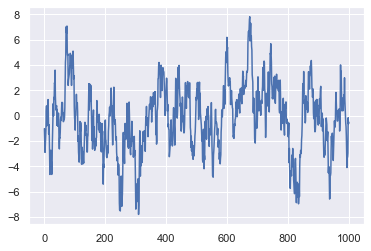

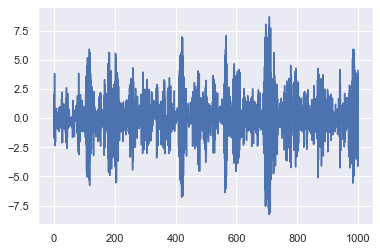

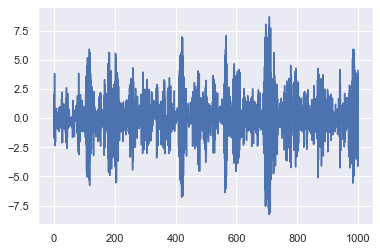

In [29]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
#remember that the sign for the AR parameter is reversed
ar1 = np.array([1,-0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()

# Plot 2: AR parameter = -0.9

ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

# Plot 3: AR parameter = 0.7
ar2 = np.array([1, -0.7])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_3= AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The three AR parameters produce very different looking time series plots.

## Comparing the ACF for Several AR Time Series

The autocorrelation function decays exponentially for AR time series at a rate of the AR parameter.For
example, if the AR parameter , Φ=0.9 , the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2 =0.82 , the third-lag will be (0.9)^ 3= 0.729, etc.A smaller AR parameter will have a steeper decay, and for negative AR parameter , say -0.9 , the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (-0.9)^2=0.81 , the third-lag will be (-0.9)^3=-0.729, etc

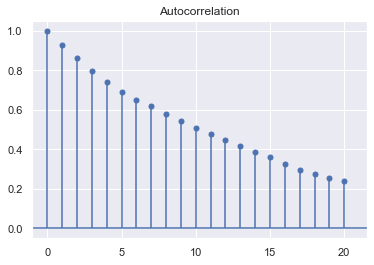

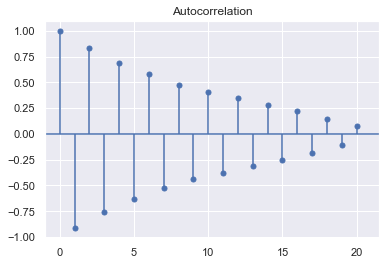

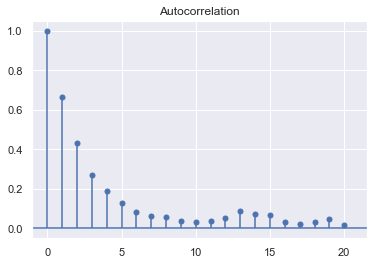

In [31]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.7
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

## Estimating an AR Model
we will estimate the AR(1) parameter, Φ, of one of the simulated series that we generated above. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

In [32]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_3, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.7, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1437.163
Method:                       css-mle   S.D. of innovations              1.018
Date:                Mon, 17 May 2021   AIC                           2880.327
Time:                        17:12:27   BIC                           2895.050
Sample:                             0   HQIC                          2885.923
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1693      0.096     -1.763      0.078      -0.358       0.019
ar.L1.y        0.6655      0.024     28.251      0.000       0.619       0.712
                                    Roots           

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Forecasting with an AR Model
In addition to estimating the parameters of a model that we did, we can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if we want the forecasts in the form of a series of data, or using the plot_predict() method if we want a plot of the forecasted data. we supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


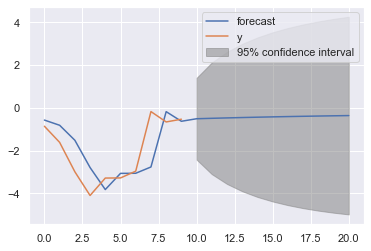

In [33]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## Forecasting KBL price in future

In [35]:
kbl=pd.read_csv("datasets/kbl_all.csv")
kbl['Date']=pd.to_datetime(kbl.Date)
kbl=kbl.set_index(kbl.Date)
kbl=kbl.drop('Date',axis=1)
kbl=kbl['Closing Price']


#### Taking the yearly price of KBL

In [36]:
kbl = kbl.resample(rule='Y').last()
kbl=kbl.dropna()

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


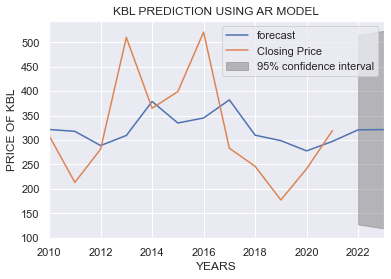

In [37]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(kbl, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2023-05')
plt.legend(fontsize=8)
plt.xlabel('YEARS')
plt.ylabel("PRICE OF KBL")
plt.title("KBL PREDICTION USING AR MODEL")
plt.legend()
plt.show()

### forcasting of interest rate

In [39]:
interest_rate=pd.read_csv('datasets/interest_rate.csv')

interest_rate['date']=pd.to_datetime(interest_rate.date)
interest_rate=interest_rate.set_index('date')
interest_rate=interest_rate['interest_rate']



C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC wil

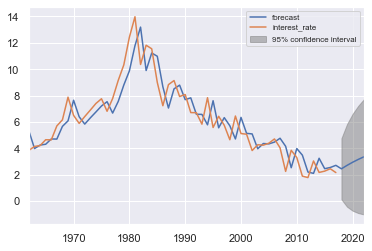

In [40]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()


According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

## Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. We will compare the ACF for the slightly mean-reverting interest rate series.

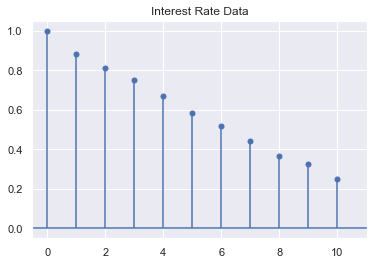

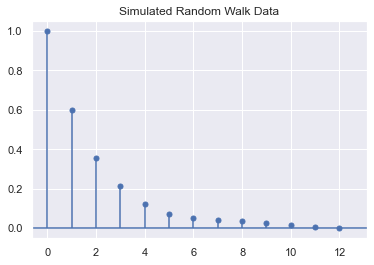

In [46]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate, alpha=1, lags=10)
plt.title("Interest Rate Data")
plt.show()


# Plotting the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data_1, alpha=1, lags=12)
plt.title("Simulated Random Walk Data")
plt.show()

Notice the Autocorrelation functions look very similar for the two series.

### Estimating the  Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). We will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. We will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

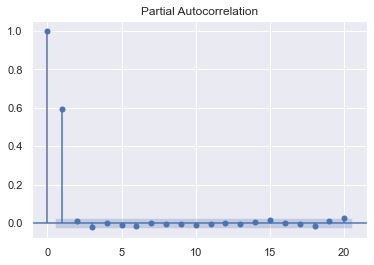

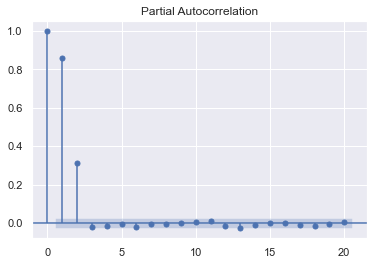

In [48]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR model

### Estimating Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. We will take the AR(2) simulated data from above, saved as simulated_data_2, and compute the BIC as we vary the order, p, in an AR(p) from 0 to 6.

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


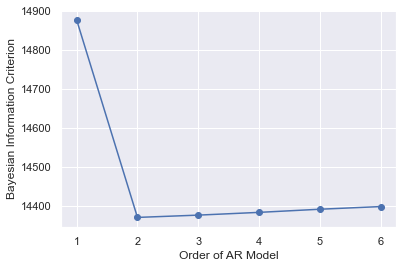

In [49]:
# Import the module for estimating an ARMA model

from statsmodels.tsa.arima_model import ARMA
 
    
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.